x1 data Meausrement = 81.47999999999999 +/- 3.0175155343427815
x2 data Meausrement = 81.28 +/- 0.3206399850299415
x1 data Relative Uncertainty = 0.037033818536362076 3.7033818536362078%
x2 data Relative Uncertainty = 0.00394488170558491 0.394488170558491%
Discrepency = 0.19999999999998863 
Significance Criterion = 3.338155519372723 
Agreement = True
Combined Measurement = 81.28223300728372 +/- 0.3188449820928756


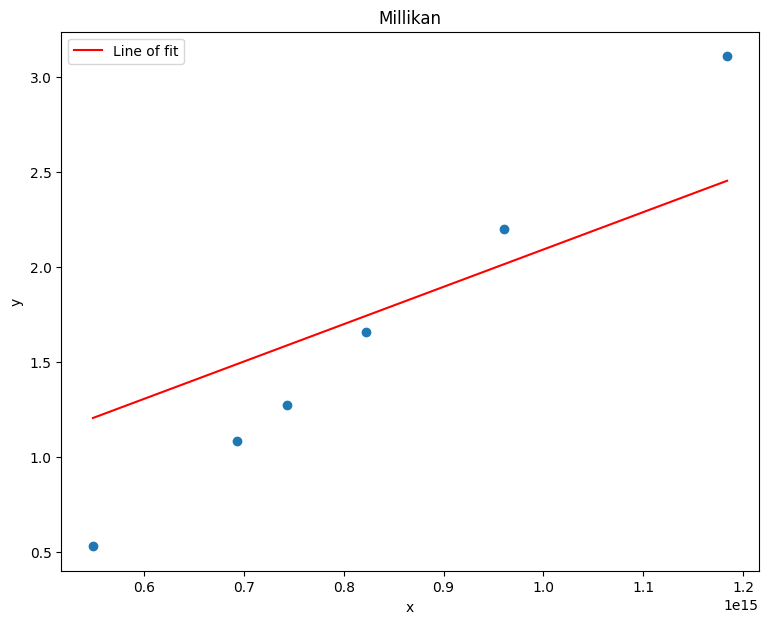

NameError: name 'dy' is not defined

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def statistical_uncertainty(xdata):
  #number of points in data
  N = len(xdata)
  #mean
  xmean = np.mean(xdata)

  sum = np.sum((xdata - xmean)**2)

  sdom = np.sqrt(sum / (N*(N-1)))

  return sdom


def total_uncertainty(xdata, typeBUnc):
  sdom = statistical_uncertainty(xdata)
  typeAUn = statistical_uncertainty(xdata)
  total_uncertainty = np.sqrt(sdom**2 + typeBUnc**2)
  return total_uncertainty


def report_Measurement(xdata, typeBUnc):
  x_best = np.mean(xdata)
  delta_x = total_uncertainty(xdata, typeBUnc)
  return x_best, delta_x


def relative_uncertainty(xdata, typeBUnc):
  x_best, delta_x = report_Measurement(xdata, typeBUnc)
  relative_uncertainty = delta_x / x_best
  percent_uncertainty = relative_uncertainty * 100
  return relative_uncertainty, percent_uncertainty

def discrepancy(x1best, dx1, x2best, dx2):
   discrepency = abs(x1best - x2best)
   signif_criterion = abs(dx1 + dx2)
   det_of_agree = discrepency <= signif_criterion
   return det_of_agree, discrepency , signif_criterion

def combine_results(xresults,dxresults):
  w_i = [(1/dx**2) for dx in dxresults]
  sum_w_i = np.sum(w_i)
  xcombined = np.sum (w_i * np.array(xresults)) / np.sum(w_i)
  dxcombined = (1) / np.sqrt(sum_w_i)
  return xcombined, dxcombined

def main():
  x1data = [72.2, 77.6,82.4,86.3,88.9]
  x2data = [80.10, 81.45, 81.50,81.34,82.01]
  typeBUnc1 = 0.3
  typeBUnc2 = 0.05

  x1best, dx1 = report_Measurement(x1data, typeBUnc1)
  x2best, dx2 = report_Measurement(x2data, typeBUnc2)
  print(f'x1 data Meausrement = {x1best} +/- {dx1}')
  print(f'x2 data Meausrement = {x2best} +/- {dx2}')

  relative_uncertainty1, percent_uncertainty1 =  relative_uncertainty(x1data, typeBUnc1)
  relative_uncertainty2, percent_uncertainty2 = relative_uncertainty(x2data, typeBUnc2)
  print(f'x1 data Relative Uncertainty = {relative_uncertainty1} {percent_uncertainty1}%')
  print(f'x2 data Relative Uncertainty = {relative_uncertainty2} {percent_uncertainty2}%')

  det_of_agree, discrepency , signif_criterion = discrepancy(x1best, dx1, x2best, dx2)
  print(f'Discrepency = {discrepency} ')
  print(f'Significance Criterion = {signif_criterion} ')
  print(f'Agreement = {det_of_agree}')

  xcombined, dxcombined = combine_results([x1best,x2best], [dx1,dx2,])
  print(f'Combined Measurement = {xcombined} +/- {dxcombined}')


if __name__ == '__main__':
  main()

def read_data(filename):
  data = np.loadtxt(filename)
  x = data[:,0]
  y = data[:,1]
  return x,y # I coulnt get this to work on colab so ill manually enter the points

def linefit(x,y):
  N = len(x)
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_xy = np.sum(x*y)
  sum_x2 = np.sum(x**2)
  m = (sum_xy - sum_x*sum_y) / (sum_x2 - sum_x**2)
  b = (sum_x2 * sum_y  - sum_x*sum_xy) / (sum_x2 - sum_x**2)
  return m,b

m,b = linefit(x,y)
x = np.array([5.4874e+14, 6.931e+14, 7.4307e+14,8.2193e+14,9.6074e+14, 1.184e+15 ])
y = np.array([0.5309,1.0842,1.2734,1.6598,2.19856,3.10891])
fig = plt.figure(figsize=(9,7))
ax  = fig.add_subplot(111)
ax.set_title("Millikan")
ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
plt.plot(x,m*x+b, color = 'red', label = 'Line of fit')
plt.legend()
plt.scatter(x,y)
plt.show()

def linefitWt(x,y,dy):
  w = 1/dy**2
  sum_w = np.sum(w)
  sum_wy = np.sum(w*y)
  sum_wx = np.sum(w*x)
  sum_wx2 = np.sum(w*x**2)
  sum_wxy = np.sum(w*x*y)
  mw = (sum_w * sum_wxy - sum_wx * sum_wy) / (sum_w * sum_wx2 - sum_wx**2)
  mb = (sum_wx2 * sum_wy - sum_wx * sum_wxy) / (sum_w * sum_wx2 - sum_wx**2)
  return mw, mb

def fit_quality(x,y,dy,m,b):
  N = len(x)
  frac = 1/N-2
  q = frac * np.sum((y-(m*x+b))/dy)**2
  return q





